In [20]:
# Character Match-up percentages

import smasharchive, smashplots

db = smasharchive.smashdb()
db.tournament_name_skip['kansai'] = 0
db.refilter_archive()
db.refilter_archive_for_ssbcentral(threshold=10)

print("")
len(db.player_rankings)

char1 = 'yoshi'
char2 = 'pika'

data_matrix = db.print_char_mu( set( [char1, char2] ) )

print("{}".format(len(data_matrix)))

import collections
import numpy
data_matrix = numpy.array(data_matrix)
winchars = collections.Counter( [ x for x in data_matrix[:, 5] ] )
print(winchars)

initiatlizing smashdb

genesis 3    2016  top16 wario              wizzrobe           pika     yoshi    9.980 9.090
genesis 3    2016  top16 wario              wizzrobe           pika     yoshi    9.980 9.090
genesis 3    2016  top8  kerokeroppi        wizzrobe           pika     yoshi    8.860 9.090
genesis 3    2016  top8  kerokeroppi        wizzrobe           pika     yoshi    8.860 9.090
genesis 3    2016  top8  kerokeroppi        wizzrobe           pika     yoshi    8.860 9.090
genesis 3    2016  top8  wizzrobe           kerokeroppi        yoshi    pika     9.090 8.860
genesis 3    2016  top16 tacos              thez               yoshi    pika     8.880 8.860
genesis 3    2016  top16 wizzrobe           dext3r             yoshi    pika     9.090 8.880
genesis 3    2016  top16 wizzrobe           dext3r             yoshi    pika     9.090 8.880
pound        2016  top16 barksanchez        fireblaster        pika     yoshi    7.680 7.480
pound        2016  top16 fireblaster        bar

In [21]:
import matplotlib.pyplot as plt

print(data_matrix[0,:])

winner_ratings = [ float(x) for x in data_matrix[:, 7] ]
loser_ratings = [ float(x) for x in data_matrix[:, 8] ]

# indices when char1 wins; when char 2 wins
temp_winnerlist = data_matrix[:,5]
char1_indices = [ idx for idx, char in enumerate(temp_winnerlist) if char == char1]
char2_indices = [ idx for idx, char in enumerate(temp_winnerlist) if char == char2]

['genesis 3' '2016' 'top16' 'wario' 'wizzrobe' 'pika' 'yoshi' '9.98' '9.09']


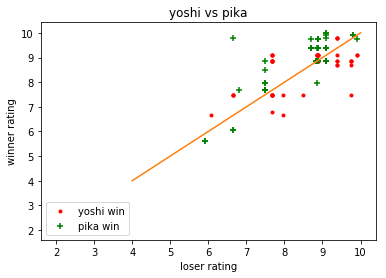

In [22]:
plt.clf()
plt.scatter( [loser_ratings[j] for j in char1_indices], [ winner_ratings[j] for j in char1_indices], marker='.', color='red', label=char1 +' win')
plt.scatter( [loser_ratings[j] for j in char2_indices], [ winner_ratings[j] for j in char2_indices], marker='+', color='green', label=char2 + ' win')
plt.plot( [2], [2])
plt.plot( [4,10], [4,10] )
plt.title("{} vs {} ; # games = ".format(char1, char2, len(wi)))
plt.ylabel("winner rating")
plt.xlabel("loser rating")
plt.legend(loc='lower left')
plt.show()

In [23]:
print(data_matrix[0,:])

winner_ratings = [ float(x) for x in data_matrix[:, 7] ]
loser_ratings = [ float(x) for x in data_matrix[:, 8] ]

# indices when char1 wins; when char 2 wins
temp_winnerlist = data_matrix[:,5]
char1_indices = [ idx for idx, char in enumerate(temp_winnerlist) if char == char1]
char2_indices = [ idx for idx, char in enumerate(temp_winnerlist) if char == char2]

['genesis 3' '2016' 'top16' 'wario' 'wizzrobe' 'pika' 'yoshi' '9.98' '9.09']
